In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import spacy
import os
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support 
import matplotlib.pyplot as plt
from scipy.sparse import identity
import cleaning
from spacy.attrs import LOWER, POS, ENT_TYPE, IS_ALPHA
from spacy.tokens import Doc
nlp = spacy.load('en_core_web_sm')
import seaborn as sns
import pickle
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sagun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sagun\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


##### Note: This file includes many tangential explorations used for website creation. Any key parts are labelled for ease of understanding.

## Clean dataset using cleaning.py

In [2]:
cmu_summ_final = cleaning.GenreDataFrame(pd.read_csv('booksummaries.txt', delimiter='\t', names=['Wiki ID','Freebase ID','Title','Author','Pub Date','Genres','Plot Summary']))

In [3]:
# DO NOT RUN UNLESS YOU HAVE NEVER RUN IT BEFORE!!!!!!!!
#cmu_summ_final.remove_names()

In [16]:
#First use: PICKLE!!!!
#pickle.dump(cmu_summ_final, open("save.p","wb"))
#wb is write binary, read with rb

In [2]:
cmu_summ_final = pickle.load( open("save.p","rb"))

In [3]:
cmu_summ_final.df['Sep Genres'] = cmu_summ_final.df['Genres'].str.findall('[A-Z]\w.+?(?="|\\\\)')

Lemmatize all of the summaries

In [4]:
lemmatizer = WordNetLemmatizer()
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J":wordnet.ADJ,
               "N":wordnet.NOUN,
               "V":wordnet.VERB,
               "R":wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def lemma_all(doc):
    var = [lemmatizer.lemmatize(w, get_wordnet_pos((w))) for w in nltk.word_tokenize(doc)]
    return ' '.join(var)

def lemma_col(corpus):
    new_summ = []
    for i in np.arange(len(corpus)):
        new_summ.append(lemma_all(corpus[i]))
    return new_summ

In [72]:
#new_summ_col = lemma_col(cmu_summ_final.df['nlpSumm'])
#don't run unless necessary

In [74]:
#cmu_summ_final.df['finalSumm']=new_summ_col

In [75]:
cmu_summ_final.df

,Wiki ID,Freebase ID,Title,Author,Pub Date,Genres,Plot Summary,nlpSumm,Sep Genres,finalSumm
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca...",the old boar on the calls the animals on the f...,"[Roman , Satire, Children's literature, Specul...",the old boar on the call the animal on the far...
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan...",a teenager living in near future leads his gan...,"[Science Fiction, Novella, Speculative fiction...",a teenager living in near future lead his gang...
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...,The text of The is divided into five parts In ...,"[Existentialism, Fiction, Absurdist fiction, N...",The text of The be divide into five part In th...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...,The argument of the proceeds by a series of in...,NaN,The argument of the proceeds by a series of in...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...,The novel posits that space around the is divi...,"[Hard science fiction, Science Fiction, Specul...",The novel posit that space around the be divid...
5,2152,/m/0x5g,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"{""/m/098tmk"": ""War novel"", ""/m/016lj8"": ""Roman...","The book tells the story of Paul Bäumer, a Ge...",The book tells the story of a German soldier w...,"[War novel, Roman ]",The book tell the story of a German soldier wh...
6,2890,/m/011zx,A Wizard of Earthsea,Ursula K. Le Guin,1968,"{""/m/0dwly"": ""Children's literature"", ""/m/01hm...","Ged is a young boy on Gont, one of the larger...",is a young boy on one of the larger islands in...,"[Children's literature, Fantasy, Speculative f...",be a young boy on one of the large island in t...
7,2950,/m/012dq,Anyone Can Whistle,Arthur Laurents,NaN,NaN,The story is set in an imaginary American tow...,The story is set in an imaginary American town...,NaN,The story be set in an imaginary American town...
8,4081,/m/01b4w,Blade Runner 3: Replicant Night,K. W. Jeter,1996-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...","Living on Mars, Deckard is acting as a consul...",Living on Deckard is acting as a consultant to...,"[Science Fiction, Speculative fiction]",Living on Deckard be act a a consultant to a m...
9,4082,/m/01b56,Blade Runner 2: The Edge of Human,K. W. Jeter,1995-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Beginning several months after the events in ...,Beginning several months after the events in D...,"[Science Fiction, Speculative fiction]",Beginning several month after the event in Dec...


In [81]:
pickle.dump(cmu_summ_final, open("save2.p","wb"))

In [3]:
cmu = pickle.load(open("save2.p","rb"))

In [4]:
single_row = cmu.single_row()

In [5]:
single_row.head()

,Title,Author,Plot Summary,finalSumm,genre
0,Animal Farm,George Orwell,"Old Major, the old boar on the Manor Farm, ca...",the old boar on the call the animal on the far...,Roman
1,A Clockwork Orange,Anthony Burgess,"Alex, a teenager living in near-future Englan...",a teenager living in near future lead his gang...,Science Fiction
2,The Plague,Albert Camus,The text of The Plague is divided into five p...,The text of The be divide into five part In th...,Existentialism
4,A Fire Upon the Deep,Vernor Vinge,The novel posits that space around the Milky ...,The novel posit that space around the be divid...,Hard science fiction
5,All Quiet on the Western Front,Erich Maria Remarque,"The book tells the story of Paul Bäumer, a Ge...",The book tell the story of a German soldier wh...,War novel


In [79]:
#single_row = cmu_summ_final.single_row()

In [6]:
single_row[single_row['genre']=='Non-fiction'].describe()

,Title,Author,Plot Summary,finalSumm,genre
count,194,194,194,194,194
unique,194,175,194,194,1
top,Collapse: How Societies Choose to Fail or Succeed,Jon Krakauer,The Abolition of Britain is a conservative po...,The of be a conservative polemic against the c...,Non-fiction
freq,1,3,1,1,194


In [8]:
single_row = single_row.reset_index().drop('index',axis=1)

In [10]:
cmu.df.head()

,Wiki ID,Freebase ID,Title,Author,Pub Date,Genres,Plot Summary,nlpSumm,Sep Genres,finalSumm
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca...",the old boar on the calls the animals on the f...,"[Roman , Satire, Children's literature, Specul...",the old boar on the call the animal on the far...
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan...",a teenager living in near future leads his gan...,"[Science Fiction, Novella, Speculative fiction...",a teenager living in near future lead his gang...
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...,The text of The is divided into five parts In ...,"[Existentialism, Fiction, Absurdist fiction, N...",The text of The be divide into five part In th...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...,The argument of the proceeds by a series of in...,NaN,The argument of the proceeds by a series of in...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...,The novel posits that space around the is divi...,"[Hard science fiction, Science Fiction, Specul...",The novel posit that space around the be divid...


In [7]:
ficnonfic_dict = {'Anthology':'Fiction', 'Comic book':'Fiction', 'Comics':'Fiction','Epistolary novel':'Fiction',
                      'Ergodic literature':'Fiction', 'Experimental literature':'Fiction','Fiction':'Fiction',
                      'First-person narrative':'Fiction', 'Gamebook':'Fiction', 'Graphic novel':'Fiction',
                      'Non-fiction novel':'Fiction', 'Novel':'Fiction', 'Novella':'Fiction','Parallel novel':'Fiction',
                      'Picture book':'Fiction', 'Play':'Fiction', 'Poetry':'Fiction', 'Prose':'Fiction','Prose poetry':'Fiction',
                      'Religious text':'Fiction', 'Role-playing game':'Fiction', 'Serial':'Fiction', 'Short story':'Fiction',
                      'Anthropology':'Non-fiction', 'Autobiographical novel':'Non-fiction', 'Autobiography':'Non-fiction', 
                      'Biographical novel':'Non-fiction', 'Biography':'Non-fiction', 'Business':'Non-fiction',
                      'Computer Science':'Non-fiction', 'Creative nonfiction':'Non-fiction', 'Economics':'Non-fiction',
                      'Essay':'Non-fiction', 'Literary criticism':'Non-fiction', 'Mathematics':'Non-fiction',
                      'Memoir':'Non-fiction', 'Neuroscience':'Non-fiction', 'Non-fiction':'Non-fiction', 
                      'Personal journal':'Non-fiction', 'Philosophy':'Non-fiction', 'Photography':'Non-fiction',
                      'Political philosophy':'Non-fiction', 'Popular culture':'Non-fiction', 'Popular science':'Non-fiction',
                      'Science':'Non-fiction', 'Sociology':'Non-fiction', 'Spirituality':'Non-fiction',
                      'Sports':'Non-fiction', 'Travel literature':'Non-fiction', 'Treatise':'Non-fiction'}

form_df = pd.DataFrame.from_dict(ficnonfic_dict, orient='index')
form_df = form_df.reset_index()
form_df.columns = ['Forms','FicNonfic']
fic_nonfic_df = single_row.merge(form_df, left_on='genre', right_on='Forms', how='outer')
fic_nonfic_df = fic_nonfic_df.dropna()

In [8]:
com_genre_dict = {'Adventure':'Adventure','Adventure novel':'Adventure', 'Naval Adventure':'Adventure',
                      'Alternate history':'Alternate history',
                      "Children's literature":"Children's literature","Boys' school stories":"Children's literature",
                      'Juvenile fantasy':"Children's literature",
                      'Comedy':'Comedy', 'Satire':'Comedy','Farce':'Comedy','Comedy of manners':'Comedy','Parody':'Comedy',
                      'Tragic comedy':'Comedy','Black comedy':'Comedy','Comic novel':'Comedy',
                      'Crime fiction':'Crime fiction', 'Cozy':'Crime fiction',
                      'Detective fiction':'Detective fiction', 'Hardboiled':'Detective fiction',
                      'Police procedural':'Detective fiction',
                      'Spy fiction':'Spy fiction','Cabal':'Spy fiction',
                      'Fantasy':'Fantasy','Bangsian fantasy':'Fantasy','Comic fantasy':'Fantasy','Contemporary fantasy':'Fantasy',
                      'Dark fantasy':'Fantasy','Fantasy of manners':'Fantasy','Heroic fantasy':'Fantasy','High fantasy':'Fantasy',
                      'Historical fantasy':'Fantasy','Low fantasy':'Fantasy','Magic realism':'Fantasy','Sword and sorcery':'Fantasy',
                      'Urban fantasy':'Fantasy',
                      'Historical fiction':'Historical fiction','Historical novel':'Historical fiction',
                      'Historical whodunnit':'Historical fiction','Wuxia':'Historical fiction',
                      'Horror':'Horror','American Gothic Fiction':'Horror','Gothic fiction':'Horror','Vampire fiction':'Horror',
                      'Zombie':'Horror','Zombies in popular culture':'Horror',
                      'Mystery':'Mystery','Whodunit':'Mystery','Locked room mystery':'Mystery',
                      'Romance novel':'Romance','Chivalric romance':'Romance','Colonial United States romance':'Romance',
                      'Elizabthan romance':'Romance','Georgian romance':'Romance','Historical romance':'Romance',
                      'Medieval romance':'Romance','Regency romance':'Romance','Romantic comedy':'Romance',
                      'Paranormal romance':'Romance',
                      'Science Fiction':'Science fiction','Alien invasion':'Science fiction','Comic science fiction':'Science fiction',
                      'Cyberpunk':'Science fiction','Dying Earth subgenre':'Science fiction','Edisonade':'Science fiction',
                      'Feminist science fiction':'Science fiction','Future history':'Science fiction','Hard science fiction':'Science fiction',
                      'Human extinction':'Science fiction','Invasion literature':'Science fiction','Military science fiction':'Science fiction',
                      'Planetary romance':'Science fiction','Postcyberpunk':'Science fiction','Scientific romance':'Science fiction',
                      'Social science fiction':'Science fiction','Soft science fiction':'Science fiction','Space opera':'Science fiction',
                      'Sword and planet':'Science fiction','Time travel':'Science fiction',
                      'Apocalyptic and post-apocalyptic fiction':'Science fiction','Biopunk':'Science fiction','Steampunk':'Science fiction',
                      'Subterranean fiction':'Science fiction',
                      'Speculative fiction':'Speculative fiction','Dystopia':'Speculative fiction','Superhero fiction':'Speculative fiction',
                      'Supernatural':'Speculative fiction','Ghost story':'Speculative fiction','Utopian and dystopian fiction':'Speculative fiction',
                      'Utopian fiction':'Speculative fiction',
                      'Suspense':'Suspense',
                      'Thriller':'Thriller','Techno-thriller':'Thriller','Conspiracy':'Thriller','Conspiracy fiction':'Thriller',
                      'Young adult literature':'Young adult literature', 'Bildungsroman':'Young adult literature',
                      'Coming of age':'Young adult literature','English public-school stories':'Young adult literature',
                      'School story':'Young adult literature','Light novel':'Young adult literature'}

com_genre_df = pd.DataFrame.from_dict(com_genre_dict, orient='index')
com_genre_df = com_genre_df.reset_index()
com_genre_df.columns = ['Subgenres','Genre']
fic_genres_df = single_row.merge(com_genre_df, left_on='genre', right_on='Subgenres', how='outer')
fic_genres_df = fic_genres_df.dropna()

In [11]:
fic_nonfic_df[fic_nonfic_df['Forms']=='Non-fiction'].describe()

,Title,Author,Plot Summary,finalSumm,genre,Forms,FicNonfic
count,194,194,194,194,194,194,194
unique,194,175,194,194,1,1,1
top,Collapse: How Societies Choose to Fail or Succeed,Jon Krakauer,The Abolition of Britain is a conservative po...,The of be a conservative polemic against the c...,Non-fiction,Non-fiction,Non-fiction
freq,1,3,1,1,194,194,194


## EDA for whole set

### Build full genre list

In [18]:
test = single_row['genre']

In [11]:
genre_list = single_row['genre']
genre_list = set(genre_list)
genre_list = list(genre_list)

In [12]:
genre_dict = dict.fromkeys(genre_list,0)

In [13]:
for i in single_row['genre'][1:]:
    genre_dict[i]=genre_dict[i]+1

### Use genre list to for all genres and plot

In [21]:
genres_df = pd.DataFrame.from_dict(genre_dict, orient='index')
genres_df = genres_df.reset_index()
genres_df.columns = ['Genre', 'Count']
genres_df.sort_values('Count', ascending=False).head()['Genre']

9379                 Fiction
6421     Speculative fiction
11626        Science Fiction
952                    Novel
12415                Fantasy
Name: Genre, dtype: object

In [22]:
genres_df.sort_values('Count', ascending=False).head(10)

,Genre,Count
9379,Fiction,4714
6421,Speculative fiction,4292
11626,Science Fiction,2725
952,Novel,2379
12415,Fantasy,2323
4595,Children's literature,1999
10098,Mystery,1358
7709,Suspense,761
5206,Young adult literature,736
8497,Crime Fiction,732


Text(0, 0.5, 'Count')

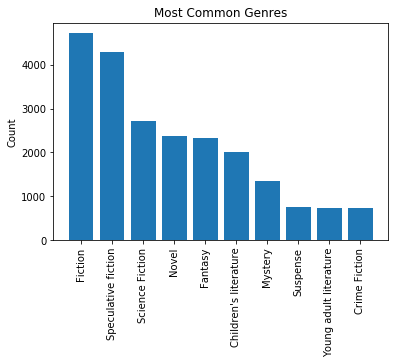

In [23]:
plt.bar(genres_df.sort_values('Count', ascending=False).head(10)['Genre'],genres_df.sort_values('Count', ascending=False).head(10)['Count'])
plt.xticks(rotation=90)
plt.title('Most Common Genres')
plt.ylabel('Count')

### Genre graph with non-form based

In [24]:
genre_den = genres_df.merge(com_genre_df, left_on='Genre', right_on='Subgenres', how='inner').drop(['Subgenres','Genre_x'],axis=1)
genre_den['Total'] = genre_den.groupby('Genre_y')['Count'].transform('sum')
genre_den = genre_den.drop('Count',axis=1).drop_duplicates('Genre_y')
genre_den

,Genre_y,Total
0,Science fiction,2998
2,Adventure,334
3,Fantasy,2539
4,Speculative fiction,4477
6,Comedy,395
8,Thriller,598
13,Crime fiction,11
15,Horror,624
18,Detective fiction,351
22,Romance,488


Text(0.5, 1.0, 'Most Common by Genre')

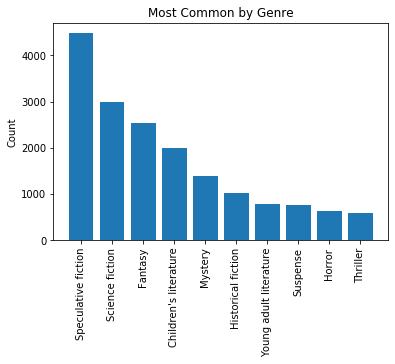

In [25]:
plt.bar(genre_den.sort_values('Total', ascending=False).head(10)['Genre_y'],genre_den.sort_values('Total', ascending=False).head(10)['Total'])
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Most Common by Genre')

### Genre graph from form

In [26]:
genre_form = genres_df.merge(form_df, left_on='Genre', right_on='Forms', how='inner').drop(['Forms','Genre'],axis=1)
genre_form['Total'] = genre_form.groupby('FicNonfic')['Count'].transform('sum')
genre_form = genre_form.drop('Count',axis=1).drop_duplicates('FicNonfic')
genre_form

,FicNonfic,Total
0,Non-fiction,726
3,Fiction,7502


Text(0.5, 1.0, 'Fiction vs Non-fiction')

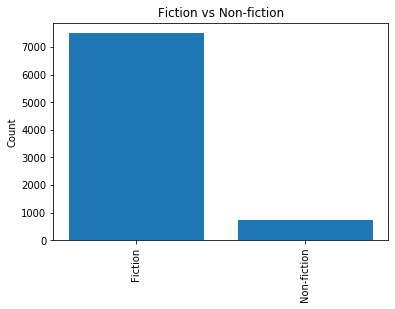

In [27]:
plt.bar(genre_form.sort_values('Total', ascending=False).head(10)['FicNonfic'],genre_form.sort_values('Total', ascending=False).head(10)['Total'])
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Fiction vs Non-fiction')

### Length of Summaries

In [28]:
cmu_summ_final.df['nlpSumm']
summ_len_dict = {}
for i in np.arange(0,len(cmu_summ_final.df['nlpSumm'])):
    summ_len_dict[i] = len(cmu_summ_final.df['nlpSumm'][i])
summ_len_dict

NameError: name 'cmu_summ_final' is not defined

In [28]:
summ_len_df = pd.DataFrame.from_dict(summ_len_dict,orient='index')

Text(0.5, 0, 'Word Count')

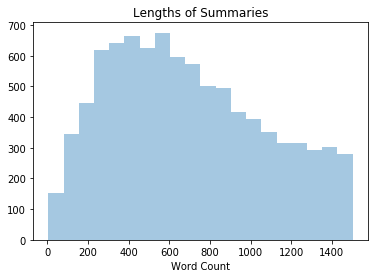

In [29]:
sns.distplot(summ_len_df.sort_values(by=0).head(9000), kde=False, bins=20)
plt.title('Lengths of Summaries')
plt.xlabel('Word Count')

### Figure out the naive bayes with best words, etc.

#### Non fiction vs fiction

In [50]:
def good_bad_words(vectorizer, test_X1, NB):
    words = np.array(vectorizer.get_feature_names())
    x = identity(test_X1.shape[1])
    probs = NB.predict_log_proba(x)[:,0]
    ind = np.argsort(probs)
    
    good_words = words[ind[:10]]
    bad_words = words[ind[-10:]]
    bad_words = bad_words[::-1]
    good_prob = probs[ind[:10]]
    bad_prob = probs[ind[-10:]]
    bad_prob = bad_prob[::-1]
    
    return good_words, bad_words, good_prob, bad_prob

In [51]:
def print_words(good_words, bad_words, good_prob, bad_prob,name_cat_1,name_cat_2):
    print(name_cat_2)
    for w, p in zip(bad_words, bad_prob):
        print("{:>20}".format(w), "{:.2f}".format(np.exp(p)))
    print("\t")
    print(name_cat_1)
    for w,p in zip(good_words, good_prob):
        print("{:>20}".format(w), "{:.2f}".format(np.exp(p)))
    print("\t")

In [49]:
def naive_bayes_cmufunc(full_df,column_y,minval,alpha_nb=1):
    full_df['id']=full_df[column_y].factorize()[0]
    cat_id_df = full_df[[column_y,'id']].drop_duplicates().sort_values('id')
    
    X = full_df['finalSumm']
    y = full_df['id']
    train_X, test_X, train_y, test_y = train_test_split(X,y, random_state=42)
    
    vectorizer = CountVectorizer(stop_words = 'english', min_df = minval)
    train_X1 = vectorizer.fit_transform(train_X)
    test_X1 = vectorizer.transform(test_X)
    vectorizer2 = TfidfVectorizer(stop_words='english', min_df = minval)
    train_X2 = vectorizer2.fit_transform(train_X)
    test_X2 = vectorizer2.transform(test_X)

    NB = MultinomialNB(alpha=alpha_nb)
    NB.fit(train_X1,train_y)
    NB2 = MultinomialNB(alpha=alpha_nb)
    NB2.fit(train_X2, train_y)

    accuracy_train1 = NB.score(train_X1,train_y)
    accuracy_train2 = NB2.score(train_X2,train_y)
    accuracy1 = NB.score(test_X1,test_y)
    accuracy2 = NB2.score(test_X2,test_y)
    words_1 = good_bad_words(vectorizer, test_X1, NB)
    words_2 = good_bad_words(vectorizer2, test_X2, NB2)
    
    return accuracy_train1, accuracy_train2, accuracy1, accuracy2, words_1, words_2, cat_id_df, NB, NB2,vectorizer,vectorizer2

In [82]:
ficnonficfin_df = genre_reduce(fic_nonfic_df,"FicNonfic","Non-fiction")

In [83]:
len(ficnonficfin_df)

1452

In [241]:
[accuracy_train1, accuracy_train2, accuracy1, accuracy2, words_1, words_2, cat_id_df, NB, NB2,c_vect,t_vect] = naive_bayes_cmufunc(ficnonficfin_df,'FicNonfic',0.05)
cmu_summ_ficnonfic = {'Training Accuracy':{'Count':accuracy_train1,'Tfidf':accuracy_train2},
                      'Testing Accuracy':{'Count':accuracy1,'Tfidf':accuracy2},
                      'Words':{'Count':words_1,'Tfidf':words_1},
                      'factorize info':cat_id_df,
                      'count_model':NB,
                      'tfidf_model':NB2,
                      'count_vect':c_vect,
                      'tfidf_vect':t_vect}
cmu_summ_ficnonfic['Training Accuracy']['Count'], cmu_summ_ficnonfic['Testing Accuracy']['Count'], cmu_summ_ficnonfic['Training Accuracy']['Tfidf'], cmu_summ_ficnonfic['Testing Accuracy']['Tfidf']

(0.8071625344352618,
 0.7878787878787878,
 0.8209366391184573,
 0.7878787878787878)

In [59]:
cmu_summ_ficnonfic['Training Accuracy']['Count'], cmu_summ_ficnonfic['Testing Accuracy']['Count'], cmu_summ_ficnonfic['Training Accuracy']['Tfidf'], cmu_summ_ficnonfic['Testing Accuracy']['Tfidf']

(0.8974234321827905,
 0.8974234321827905,
 0.9120077783179388,
 0.9110354885755956)

In [245]:
cmu_summ_ficnonfic['Words']['Count']
g1 = cmu_summ_ficnonfic['Words']['Count'][0]
b1 = cmu_summ_ficnonfic['Words']['Count'][1]
gp1 = cmu_summ_ficnonfic['Words']['Count'][2]
bp1 = cmu_summ_ficnonfic['Words']['Count'][3]

In [246]:
print_words(g1,b1,gp1,bp1,'Fiction Words', 'Non Fiction Words')

Non Fiction Words
              argues 0.93
              theory 0.91
             chapter 0.88
             example 0.86
           describes 0.82
              author 0.81
             subject 0.80
               issue 0.80
          individual 0.79
               spent 0.79
	
Fiction Words
                ship 0.10
             reveals 0.19
           discovers 0.20
          mysterious 0.21
              refuse 0.22
              battle 0.22
                kill 0.22
          apparently 0.23
              agrees 0.23
              rescue 0.23
	


In [73]:
cmu_summ_ficnonfic['Words']['Tfidf']
g2 = cmu_summ_ficnonfic['Words']['Tfidf'][0]
b2 = cmu_summ_ficnonfic['Words']['Tfidf'][1]
gp2 = cmu_summ_ficnonfic['Words']['Tfidf'][2]
bp2 = cmu_summ_ficnonfic['Words']['Tfidf'][3]

In [74]:
print_words(g2,b2,gp2,bp2,'Non Fic Words', 'Fic Words')

Fic Words
                kill 0.97
              escape 0.96
               novel 0.96
               night 0.95
             decides 0.95
                fall 0.95
            daughter 0.95
                tell 0.94
              return 0.94
           character 0.94
	
Non Fic Words
                book 0.80
             include 0.82
                work 0.84
              people 0.85
                 say 0.86
                 way 0.86
              family 0.87
                live 0.88
                like 0.88
                 use 0.89
	


In [39]:
cmu_summ_ficnonfic['Training Accuracy']['Count'], cmu_summ_ficnonfic['Testing Accuracy']['Count'], cmu_summ_ficnonfic['Training Accuracy']['Tfidf'], cmu_summ_ficnonfic['Testing Accuracy']['Tfidf']

(0.8956409009884946,
 0.8988818667963053,
 0.9120077783179388,
 0.9110354885755956)

In [27]:
#single multinomialNB, instead of 10 different as below
len(fic_genres_df[fic_genres_df['Genre']=='Thriller'])

598

In [29]:
#create df with only 598 of each genre (like the smallest genre, Thriller)
nb_df_spec = fic_genres_df[fic_genres_df['Genre']=='Speculative fiction'] 
nb_df_scifi = fic_genres_df[fic_genres_df['Genre']=='Science fiction']
nb_df_fan = fic_genres_df[fic_genres_df['Genre']=='Fantasy']
nb_df_child = fic_genres_df[fic_genres_df['Genre']=="Children's literature"]
nb_df_mys = fic_genres_df[fic_genres_df['Genre']=='Mystery']
nb_df_hist = fic_genres_df[fic_genres_df['Genre']=='Historical fiction']
nb_df_you = fic_genres_df[fic_genres_df['Genre']=='Young adult literature']
nb_df_sus = fic_genres_df[fic_genres_df['Genre']=='Suspense']
nb_df_hor = fic_genres_df[fic_genres_df['Genre']=='Horror']

In [43]:
nb_df = fic_genres_df[fic_genres_df['Genre']=="Thriller"]
nb_df = nb_df.append(nb_df_scifi.sample(n=598, random_state=42))
nb_df = nb_df.append(nb_df_fan.sample(n=598, random_state=42))
nb_df = nb_df.append(nb_df_child.sample(n=598, random_state=42))
nb_df = nb_df.append(nb_df_mys.sample(n=598, random_state=42))
nb_df = nb_df.append(nb_df_hist.sample(n=598, random_state=42))
nb_df = nb_df.append(nb_df_you.sample(n=598, random_state=42))
nb_df = nb_df.append(nb_df_sus.sample(n=598, random_state=42))
nb_df = nb_df.append(nb_df_spec.sample(n=598, random_state=42))
nb_df = nb_df.append(nb_df_hor.sample(n=598, random_state=42))

In [63]:
all_genres_dict = naive_bayes_dict(nb_df,"Genre",0.05)
all_genres_dict['Training Accuracy'], all_genres_dict['Testing Accuracy']

({'Count': 0.40958751393534004, 'Tfidf': 0.4434782608695652},
 {'Count': 0.348494983277592, 'Tfidf': 0.34448160535117056})

In [65]:
all_genres_dict

{'Training Accuracy': {'Count': 0.40958751393534004,
  'Tfidf': 0.4434782608695652},
 'Testing Accuracy': {'Count': 0.348494983277592,
  'Tfidf': 0.34448160535117056},
 'Words': {'Count': (array(['magic', 'spirit', 'adventure', 'society', 'servant', 'companion',
          'creature', 'teacher', 'window', 'planet'], dtype='<U13'),
   array(['team', 'agent', 'american', 'mission', 'military', 'weapon',
          'government', 'investigation', 'area', 'killer'], dtype='<U13'),
   array([-3.97743186, -3.74681112, -3.55738368, -3.38109005, -3.34023436,
          -3.29805467, -3.25299919, -3.24287073, -3.19481392, -3.18836015]),
   array([-1.11511244, -1.31127006, -1.4264785 , -1.49700582, -1.50355941,
          -1.56820496, -1.60802876, -1.63241791, -1.63535905, -1.65203372])),
  'Tfidf': (array(['magic', 'spirit', 'adventure', 'society', 'servant', 'companion',
          'creature', 'teacher', 'window', 'planet'], dtype='<U13'),
   array(['team', 'agent', 'american', 'mission', 'military',

In [73]:
test_text = "Sidney Harris, the Hereditary President of the People's Republic of Haven, discusses the economic and military situation with his cabinet. Secretary of the Economy Walter Frankel presents the latest grim economic projections, blaming the naval budget. Admiral Amos Parnell retorts that the fleet is required to hold on to recently acquired star systems, and blames the bleak economic situation on the increases in the Basic Living Stipend instead. Frankel responds that the BLS increases are the only thing keeping the mob in check. Neither man is willing to budge, and both concede that additional income is required and, per the DuQuesne Plan the source of this income should be new conquests. Moving southwards towards Erewhon is rejected as too dangerous as the Solarian League could see it as a threat. Moving westwards towards the Silesian Confederacy is seen as the better option, but the Basilisk system is in the way, and the Basilisk system contains a terminus of the Manticore Wormhole Junction. The decision is made to take over the Basilisk system and Admiral Parnell is tasked with drawing up plans to that effect. The story Commander Honor Harrington, freshly graduated from the Royal Manticoran Navy's Advanced Tactical Course, assumes command of the light cruiser HMS Fearless, as it completes an extensive weapons refit, discovering, to her chagrin, that its normal complement of weapons has been stripped, replaced primarily by a 'grav lance' commissioned by Admiral Sonja Hemphill. While Harrington uses it to perform spectacularly in the first round of a series of war games, her ship is summarily crushed in all following ones, and for the same simple reason: the grav lance is devastatingly effective at close range, but Fearless has neither the armor nor the other weaponry needed to close with an enemy ship. In order to cover up the embarrassing failure of her experiment, Admiral Hemphill (a cousin of Sir Edward Janáček, First Lord of the Admiralty), has Fearless reassigned to picket duty on Basilisk Station, a remote outpost of Manticore. At Medusa, Harrington finds Basilisk's picket fleet commanded by Captain Lord Pavel Young, a spoiled noble whose lackluster career is due in part to his attempt to rape Honor at the Academy several years earlier, and who has set up a ploy to ruin Honor's career. Taking his heavy cruiser Warlock off to Manticore for a 'desperately needed' refit, Young leaves Honor and Fearless as the sole RMN unit responsible for the Basilisk system's security, a duty almost impossible to perform with a single ship. With hard work and clever use of resources, Honor soon has revitalized the RMN’s presence in Basilisk, capturing several prizes on charges of smuggling, and turning around the abysmal opinion of the fleet held by system personnel. During this, Honor learns of a long-standing drug ring catering to the Medusan aborigines, a three-legged sentient species at a Bronze Age technology level. The drug, mehoka, has a place in Medusan religion for its hallucinogenic properties, but can also be used to incite them to furious violence. Fearless's investigations reveal that humans have been synthesizing it on the planet for distribution to the nomadic members of the species. A raid on this drug lab also reveals the presence of further contamination: breech-loading flintlock rifles designed specifically for Medusan use, and crude enough for the Medusans to manufacture themselves. Whilst embroiled in this plot and trying to uncover who might be behind it, Honor Harrington becomes a figure of political note for the first time. In order to capitalize on Honor's accomplishments and discredit the conservatives in the government who are pushing for the Kingdom's withdrawal from Basilisk, a group of officers and politicians conspire to delay the completion of Warlock's refit and keep Young away from his post for as long as possible. Harrington and her crew get to the bottom of the sprawling plot: Haven, intent on conquering Medusa for their own, have arranged for a coup de main against Basilisk. By whipping some of the Medusan nomads into a killing frenzy that will sweep across the planet in a haze of blood, they can claim legal pretext to swoop in and take control of the system before Manticore can respond, as a preamble to invading Manticore itself The ground force of Medusans is easily dealt with by Fearless's complement of Marines. However, the other half of the plan is the Sirius, a Havenite Q-ship disguised as a freighter with the task of signaling the Havenite fleet. Harrington cripples the one other Havenite ship in orbit (a diplomatic courier) and sends Fearless in pursuit of Sirius, notifying Manticore of the impending invasion. What follows is a grueling battle in which Fearless is crippled, but Sirius' captain is sufficiently vexed by the damage inflicted by the small light cruiser that he turns Sirius about to ensure that she is destroyed. In doing so, he inadvertently brings Sirius within range of Fearless' grav lance, and Sirius is destroyed. Manticore reinforces the system in time to greet the “visiting” Haven task force, who leave after a suitable interval to inform Haven of failure. After extensive repairs just to get her mauled ship underway, Honor returns to the Star Kingdom to a hero’s welcome. Promoted twice to Captain of the List, Honor is disappointed when the light cruiser is retired from service, but instead, she is given command of a newly constructed Star Knight-class heavy cruiser, re-christened as the new Fearless."
test_text = [test_text]
input_text = all_genres_dict['count_vect'].transform(test_text)
genre_array = all_genres_dict['count_model'].predict_proba(input_text)
genre_array[0]

array([1.58982210e-07, 9.99747033e-01, 2.53002758e-08, 5.47125596e-15,
       2.88314548e-17, 2.54190104e-11, 1.37821279e-19, 1.85334940e-14,
       2.52782344e-04, 7.13181140e-14])

 #### Fiction genres

In [78]:
def genre_group(summ_df, genre, non_genre,new_col, non_after=False):
    fic_summ = summ_df.drop(['genre','Subgenres'], axis=1)
    fic_summ.loc[fic_summ['Genre']==genre, new_col] = genre
    fic_summ.loc[fic_summ['Genre']!=genre, new_col] = non_genre
    fic_summ = fic_summ.sort_values(new_col, ascending=non_after).drop_duplicates('Title')
    return fic_summ

In [105]:
fic_spec = genre_group(fic_genres_df, 'Speculative fiction','NonSpec','SpecFic')
fic_scifi = genre_group(fic_genres_df, 'Science fiction','NonSci','SciFi')
fic_fan = genre_group(fic_genres_df, 'Fantasy','NonFan','Fantasy', non_after=True)
fic_child = genre_group(fic_genres_df, "Children's literature",'NonChild','Child', non_after=True)
fic_mys = genre_group(fic_genres_df, 'Mystery','NonMys','Mystery', non_after=True)
fic_hist = genre_group(fic_genres_df, 'Historical fiction','NonHist','Hist', non_after=True)
fic_you = genre_group(fic_genres_df, 'Young adult literature','NonYou','Young')
fic_sus = genre_group(fic_genres_df, 'Suspense','NonSus','Susp')
fic_hor = genre_group(fic_genres_df, 'Horror','NonHor','Horror', non_after=True)
fic_thr = genre_group(fic_genres_df, 'Thriller','NonThr','Thriller')

In [106]:
len(fic_thr[fic_thr['Thriller']!="Thriller"])

8714

In [79]:
def genre_reduce(genre_df,col_name,col_type):
    df1 = genre_df[genre_df[col_name]==col_type]
    df2 = genre_df[genre_df[col_name]!=col_type]
    df2 = df2.sample(n=len(df1),random_state=42)
    together = df1.append(df2)
    return together

In [107]:
fic_spec2 = fic_spec #this particular set already almost has parody, so it doesn't get reduced
fic_scifi2 = genre_reduce(fic_scifi,'SciFi','Science fiction')
fic_fan2 = genre_reduce(fic_fan,'Fantasy','Fantasy')
fic_child2 = genre_reduce(fic_child,'Child',"Children's literature")
fic_mys2 = genre_reduce(fic_mys,'Mystery','Mystery')
fic_hist2 = genre_reduce(fic_hist,'Hist','Historical fiction')
fic_you2 = genre_reduce(fic_you,'Young','Young adult literature')
fic_sus2 = genre_reduce(fic_sus,'Susp','Suspense')
fic_hor2 = genre_reduce(fic_hor,'Horror','Horror')
fic_thr2 = genre_reduce(fic_thr,'Thriller','Thriller')

In [48]:
def naive_bayes_dict(df,column,mindf_val,alpha_nb=1):
    [accuracy_train1, accuracy_train2, accuracy1, accuracy2, words_1, words_2, cat_id_df,NB,NB2,c_vect,t_vect] = naive_bayes_cmufunc(df,column,mindf_val,alpha_nb)
    final_dict = {'Training Accuracy':{'Count':accuracy_train1,'Tfidf':accuracy_train2},
                      'Testing Accuracy':{'Count':accuracy1,'Tfidf':accuracy2},
                      'Words':{'Count':words_1,'Tfidf':words_1},
                      'factorize info':cat_id_df,
                      'count_model':NB,
                      'tfidf_model':NB2,
                      'count_vect':c_vect,
                      'tfidf_vect':t_vect}
    return final_dict

In [240]:
cmu_summ_specfic = naive_bayes_dict(fic_spec2,'SpecFic',0.02)
cmu_summ_scifi = naive_bayes_dict(fic_scifi2, 'SciFi',0.02)
cmu_summ_fan = naive_bayes_dict(fic_fan2, 'Fantasy',0.05)
cmu_summ_child = naive_bayes_dict(fic_child2, 'Child',0.07)
cmu_summ_mys = naive_bayes_dict(fic_mys2, 'Mystery',0.03)
cmu_summ_hist = naive_bayes_dict(fic_hist2, 'Hist',0.04)
cmu_summ_you = naive_bayes_dict(fic_you2, 'Young',0.02)
cmu_summ_sus = naive_bayes_dict(fic_sus2, 'Susp',0.04)
cmu_summ_hor = naive_bayes_dict(fic_hor2, 'Horror',0.09)
cmu_summ_thr = naive_bayes_dict(fic_thr2, 'Thriller',0.08)

In [242]:
cmu_summ_full = {"Speculative fiction":cmu_summ_specfic,
                "Science fiction": cmu_summ_scifi,
                "Fantasy": cmu_summ_fan,
                "Children's literature":cmu_summ_child,
                "Mystery":cmu_summ_mys,
                "Historical fiction":cmu_summ_hist,
                "Young adult literature":cmu_summ_you,
                "Suspense":cmu_summ_sus,
                "Horror":cmu_summ_hor,
                "Thriller":cmu_summ_thr,
                "FicnonFic":cmu_summ_ficnonfic}

In [243]:
pickle.dump(cmu_summ_full, open("nb_builds.p","wb"))

In [210]:
def print_words_all(summ_dict, not_label, label):
    g1 = summ_dict['Words']['Count'][0]
    b1 = summ_dict['Words']['Count'][1]
    gp1 = summ_dict['Words']['Count'][2]
    bp1 = summ_dict['Words']['Count'][3]

    print_words(g1,b1,gp1,bp1,not_label,label)
    
    g2 = summ_dict['Words']['Tfidf'][0]
    b2 = summ_dict['Words']['Tfidf'][1]
    gp2 = summ_dict['Words']['Tfidf'][2]
    bp2 = summ_dict['Words']['Tfidf'][3]

    print_words(g2,b2,gp2,bp2,not_label,label)
    
    print(summ_dict['Training Accuracy']['Count'], summ_dict['Testing Accuracy']['Count'], summ_dict['Training Accuracy']['Tfidf'], summ_dict['Testing Accuracy']['Tfidf'])

In [247]:
print_words_all(cmu_summ_specfic,'Non Spec','Speculative fiction')

Speculative fiction
              specie 0.78
        civilization 0.77
               orbit 0.76
               demon 0.76
             magical 0.76
              colony 0.76
              galaxy 0.75
               space 0.74
            humanity 0.74
              planet 0.73
	
Non Spec
              french 0.20
                bond 0.21
             russian 0.22
           detective 0.24
            murderer 0.24
              letter 0.24
             british 0.25
               hotel 0.25
                bank 0.26
                lady 0.26
	
Speculative fiction
              specie 0.78
        civilization 0.77
               orbit 0.76
               demon 0.76
             magical 0.76
              colony 0.76
              galaxy 0.75
               space 0.74
            humanity 0.74
              planet 0.73
	
Non Spec
              french 0.20
                bond 0.21
             russian 0.22
           detective 0.24
            murderer 0.24
              letter 0.24


In [244]:
print_words_all(cmu_summ_scifi,'Non Sci Fi','Sci Fi')

Sci Fi
              galaxy 0.99
               orbit 0.97
              planet 0.97
               alien 0.95
           spaceship 0.95
               space 0.94
               robot 0.94
          technology 0.93
            colonist 0.93
               solar 0.93
	
Non Sci Fi
                aunt 0.08
              lawyer 0.16
           detective 0.18
              french 0.18
         grandmother 0.18
              letter 0.19
               money 0.20
               marry 0.20
             wedding 0.21
            birthday 0.22
	
Sci Fi
              galaxy 0.99
               orbit 0.97
              planet 0.97
               alien 0.95
           spaceship 0.95
               space 0.94
               robot 0.94
          technology 0.93
            colonist 0.93
               solar 0.93
	
Non Sci Fi
                aunt 0.08
              lawyer 0.16
           detective 0.18
              french 0.18
         grandmother 0.18
              letter 0.19
               money 0

In [213]:
print_words_all(cmu_summ_fan,'Non Fantasy','Fantasy')

Fantasy
             magical 0.97
               magic 0.96
              dragon 0.94
               spell 0.94
               sword 0.87
             kingdom 0.84
                 god 0.84
             warrior 0.83
               quest 0.81
                king 0.80
	
Non Fantasy
            american 0.18
               money 0.18
          government 0.22
             officer 0.23
               agent 0.23
              police 0.23
                 car 0.24
                case 0.26
            military 0.27
             suicide 0.28
	
Fantasy
             magical 0.97
               magic 0.96
              dragon 0.94
               spell 0.94
               sword 0.87
             kingdom 0.84
                 god 0.84
             warrior 0.83
               quest 0.81
                king 0.80
	
Non Fantasy
            american 0.18
               money 0.18
          government 0.22
             officer 0.23
               agent 0.23
              police 0.23
                 c

In [214]:
print_words_all(cmu_summ_child,"Non Children's","Children's Literature")

Children's Literature
              school 0.75
                 boy 0.70
              parent 0.68
                play 0.68
                girl 0.65
              mother 0.65
              little 0.64
               house 0.63
           adventure 0.63
                home 0.63
	
Non Children's
              planet 0.15
             contact 0.25
         information 0.29
             mission 0.33
              future 0.33
              murder 0.34
                ship 0.34
                case 0.34
                 men 0.35
             various 0.35
	
Children's Literature
              school 0.75
                 boy 0.70
              parent 0.68
                play 0.68
                girl 0.65
              mother 0.65
              little 0.64
               house 0.63
           adventure 0.63
                home 0.63
	
Non Children's
              planet 0.15
             contact 0.25
         information 0.29
             mission 0.33
              future 0.33
          

In [215]:
print_words_all(cmu_summ_mys,'Non Mystery','Mystery')

Mystery
            murderer 0.92
           detective 0.89
               solve 0.87
              lawyer 0.87
              killer 0.87
              murder 0.85
       investigation 0.85
                case 0.84
               crime 0.83
             mystery 0.82
	
Non Mystery
              planet 0.06
               space 0.10
         destruction 0.15
               alien 0.17
               slave 0.18
                king 0.18
               earth 0.19
             soldier 0.20
               quest 0.20
             journey 0.20
	
Mystery
            murderer 0.92
           detective 0.89
               solve 0.87
              lawyer 0.87
              killer 0.87
              murder 0.85
       investigation 0.85
                case 0.84
               crime 0.83
             mystery 0.82
	
Non Mystery
              planet 0.06
               space 0.10
         destruction 0.15
               alien 0.17
               slave 0.18
                king 0.18
               ear

In [216]:
print_words_all(cmu_summ_hist,'Non Hist Fic','Historical Fiction')

Historical Fiction
              french 0.89
          historical 0.82
             english 0.82
           political 0.80
             british 0.77
              priest 0.76
               slave 0.76
            marriage 0.76
             soldier 0.76
             wealthy 0.76
	
Non Hist Fic
              planet 0.01
               human 0.09
            creature 0.12
                 fly 0.18
              police 0.18
             ability 0.19
             problem 0.20
               world 0.20
                game 0.25
             destroy 0.25
	
Historical Fiction
              french 0.89
          historical 0.82
             english 0.82
           political 0.80
             british 0.77
              priest 0.76
               slave 0.76
            marriage 0.76
             soldier 0.76
             wealthy 0.76
	
Non Hist Fic
              planet 0.01
               human 0.09
            creature 0.12
                 fly 0.18
              police 0.18
             ability

In [217]:
print_words_all(cmu_summ_you,'Non Young Adult','Young Adult')

Young Adult
                teen 0.90
                 mom 0.88
           boyfriend 0.87
                kiss 0.87
                 dad 0.85
               grade 0.82
            argument 0.81
         grandmother 0.81
             college 0.80
             sixteen 0.79
	
Non Young Adult
            humanity 0.06
               alien 0.13
            murderer 0.14
            invasion 0.14
             nuclear 0.15
               troop 0.16
              nation 0.16
        intelligence 0.17
                ally 0.17
          assistance 0.17
	
Young Adult
                teen 0.90
                 mom 0.88
           boyfriend 0.87
                kiss 0.87
                 dad 0.85
               grade 0.82
            argument 0.81
         grandmother 0.81
             college 0.80
             sixteen 0.79
	
Non Young Adult
            humanity 0.06
               alien 0.13
            murderer 0.14
            invasion 0.14
             nuclear 0.15
               troop 0.16
  

In [218]:
print_words_all(cmu_summ_sus,'Non Suspense','Suspense')

Suspense
              lawyer 0.90
               phone 0.86
       investigation 0.85
            murderer 0.84
           blackmail 0.84
              murder 0.84
              police 0.82
           detective 0.82
                case 0.81
              estate 0.80
	
Non Suspense
              planet 0.06
               human 0.18
               space 0.20
              defeat 0.21
             century 0.23
             journey 0.23
                army 0.23
                ship 0.23
                city 0.24
              animal 0.24
	
Suspense
              lawyer 0.90
               phone 0.86
       investigation 0.85
            murderer 0.84
           blackmail 0.84
              murder 0.84
              police 0.82
           detective 0.82
                case 0.81
              estate 0.80
	
Non Suspense
              planet 0.06
               human 0.18
               space 0.20
              defeat 0.21
             century 0.23
             journey 0.23
              

In [219]:
print_words_all(cmu_summ_hor,'Non Horror','Horror')

Horror
             vampire 0.91
               blood 0.80
                room 0.65
                trap 0.64
               night 0.62
             reveals 0.62
                fear 0.61
                kill 0.61
             strange 0.61
              figure 0.61
	
Non Horror
                 war 0.26
                plot 0.29
               party 0.32
                land 0.32
              police 0.34
                ship 0.34
             journey 0.35
                work 0.35
               marry 0.35
              leader 0.36
	
Horror
             vampire 0.91
               blood 0.80
                room 0.65
                trap 0.64
               night 0.62
             reveals 0.62
                fear 0.61
                kill 0.61
             strange 0.61
              figure 0.61
	
Non Horror
                 war 0.26
                plot 0.29
               party 0.32
                land 0.32
              police 0.34
                ship 0.34
             journey 0

In [249]:
print_words_all(cmu_summ_thr,'Non Thriller','Thriller')

Thriller
               agent 0.82
                team 0.82
       investigation 0.77
                shot 0.75
         information 0.72
             mission 0.72
                plot 0.72
               shoot 0.71
                 car 0.71
          government 0.71
	
Non Thriller
             journey 0.25
               human 0.28
                city 0.30
           encounter 0.33
              travel 0.33
               great 0.34
              little 0.35
              living 0.35
                away 0.35
              mother 0.36
	
Thriller
               agent 0.82
                team 0.82
       investigation 0.77
                shot 0.75
         information 0.72
             mission 0.72
                plot 0.72
               shoot 0.71
                 car 0.71
          government 0.71
	
Non Thriller
             journey 0.25
               human 0.28
                city 0.30
           encounter 0.33
              travel 0.33
               great 0.34
              

In [221]:
cmu_summ_scifi

{'Training Accuracy': {'Count': 0.7939698492462312,
  'Tfidf': 0.8071308925580283},
 'Testing Accuracy': {'Count': 0.7846374730796841,
  'Tfidf': 0.7875089734386217},
 'Words': {'Count': (array(['aunt', 'lawyer', 'detective', 'french', 'grandmother', 'letter',
          'money', 'marry', 'wedding', 'birthday'], dtype='<U13'),
   array(['galaxy', 'orbit', 'planet', 'alien', 'spaceship', 'space',
          'robot', 'technology', 'colonist', 'solar'], dtype='<U13'),
   array([-2.50390397, -1.80970802, -1.72893749, -1.72435743, -1.71600221,
          -1.65156725, -1.63063978, -1.61398438, -1.54096824, -1.53609056]),
   array([-0.01487162, -0.02564733, -0.02753701, -0.05105241, -0.05161245,
          -0.05705151, -0.06506309, -0.07106967, -0.07209054, -0.07312502])),
  'Tfidf': (array(['aunt', 'lawyer', 'detective', 'french', 'grandmother', 'letter',
          'money', 'marry', 'wedding', 'birthday'], dtype='<U13'),
   array(['galaxy', 'orbit', 'planet', 'alien', 'spaceship', 'space',
     

In [222]:
def check_ficnonfic(test_text):
    test_text = cmu_summ_ficnonfic['count_vect'].transform(test_text)
    prob = cmu_summ_ficnonfic['count_model'].predict_proba(test_text)[0][0]
    return prob

In [228]:
def check_genre(test_text,genre_dict,vect_type,model_type):
    test_text = genre_dict[vect_type].transform(test_text)
    prob = genre_dict[model_type].predict_proba(test_text)[0][0]
    return prob

In [229]:
def test_genre(test_test):
    genre_dict_list = [cmu_summ_specfic,cmu_summ_scifi,cmu_summ_fan,cmu_summ_child,cmu_summ_mys,cmu_summ_hist,cmu_summ_you,
                      cmu_summ_sus,cmu_summ_hor,cmu_summ_thr]
    genre_vect_list = ['tfidf_vect','count_vect','count_vect','count_vect','tfidf_vect','count_vect','count_vect','count_vect',
                      'tfidf_vect','tfidf_vect']
    genre_model_list = ['tfidf_model','count_model','count_model','count_model','tfidf_model','count_model','count_model',
                       'count_model','tfidf_model','tfidf_model']
    genre_list = ['Speculative Fiction','Science fiction','Fantasy',"Children's literature",'Mystery','Historical fiction',
                 'Young adult literature','Suspense','Horror','Thriller']
    genre_values = {}
    i=0
    for genre_dict in genre_dict_list:
        genre_values[genre_list[i]] = check_genre(test_test,genre_dict,genre_vect_list[i],genre_model_list[i])
        i = i+1
    genre_values = pd.DataFrame.from_dict(genre_values, orient='index')
    genre_values.columns = ['Probability']
    genre_values = genre_values.sort_values(by='Probability', ascending=False)
    return genre_values

In [236]:
test_text=["it was a dark and stormy night"]

In [234]:
test_text = cmu_summ_hor['tfidf_vect'].transform(test_text)

In [237]:
check_genre(test_text,cmu_summ_hor,'tfidf_vect','tfidf_model')

0.6359824734775992

In [238]:
test_genre(test_text)

,Probability
Fantasy,0.639666
Horror,0.635982
Young adult literature,0.615727
Suspense,0.545140
Children's literature,0.526285
Mystery,0.468558
Speculative Fiction,0.464916
Thriller,0.442898
Historical fiction,0.422067
Science fiction,0.303200


In [239]:
test_text2 = list(cmu_summ_final.df[cmu_summ_final.df['Title']=='On Basilisk Station']['Plot Summary'])

NameError: name 'cmu_summ_final' is not defined

In [227]:
def clean_test(test_text):
    test_nlp = nlp(test_text)
    indexes = []
    for index, token in enumerate(test_nlp):
        if (token.pos_ in ('PUNCT','SPACE','PROPN')):
            indexes.append(index)
    np_array = test_nlp.to_array([LOWER, POS, ENT_TYPE, IS_ALPHA])
    np_array = np.delete(np_array, indexes, axis=0)
    doc2 = Doc(test_nlp.vocab, words=[t.text for i, t in enumerate(test_nlp) if i not in indexes])
    doc2.from_array([LOWER, POS, ENT_TYPE, IS_ALPHA], np_array)
    return doc2.text    

In [233]:
test_text_3 = clean_test(test_text2[0])

In [235]:
test_text_3

"the of the 's of discusses the economic and military situation with his cabinet The of presents the latest economic projections which look very bad He blames the naval budget Admiral points out that the fleet is required to hold on to recently acquired star systems He blames the increases of the Stipend for the bleak economic situation responds that the increases are the only thing keeping the mob in check The resulting discussion leads to the realization that additional income is required to finance the and a military that can hold on to the current star systems Following the Plan the source of these income should be new conquests Moving southwards towards is rejected as too dangerous as the could see it as a threat Moving westwards towards is seen as the better option but the system is in the way The system contains a terminus of the The decision is made to take over the system and is tasked with drawing up plans to that effect freshly graduated from the ’s Course assumes command of

In [245]:
test_text_3 = clean_test(test_text2[0])
test_text_3 = [test_text_3]
test_genre(test_text_3)

,Probability
Science fiction,0.999992
Thriller,0.973137
Speculative Fiction,0.969946
Fantasy,0.073066
Historical fiction,0.014757
Suspense,0.014360
Children's literature,0.009969
Horror,0.003552
Mystery,0.002315
Young adult literature,0.000031


In [283]:
def final_model(test_text):
    text = clean_test(test_text)
    text = [text]
    value = check_ficnonfic(text)
    if value>0.5:
        df = test_genre(text)
        print('This is Fiction')
        print(df)
    else:
        print('This is Non-Fiction')
        print(1-value)

In [251]:
final_model(test_text2[0])

This is Fiction
                     Probability
Science fiction         0.999992
Thriller                0.973137
Speculative Fiction     0.969946


In [253]:
type(test_text2[0])

str

In [278]:
single_row[single_row['genre']=='Biography']

,Title,Author,Plot Summary,nlpSumm,genre
553,Angela's Ashes,Frank McCourt,"Born in Brooklyn, New York, on 19 August 1930...",Born in on 19 1930 was the eldest son of and l...,Biography
729,The Missionary Position,Christopher Hitchens,Hitchens condemns Mother Teresa for having us...,condemns for having used contributions to open...,Biography
1060,"A Child Called ""It""",Dave Pelzer,The book is written as a memoir which covers ...,The book is written as a memoir which covers p...,Biography
1292,Fanshawe,Nathaniel Hawthorne,"Dr. Melmoth, the President of Harley College,...",the of takes into his care the daughter of his...,Biography
1606,The Last Hurrah,Edwin O'Connor,The plot of The Last Hurrah focuses on a mayo...,The plot of The Last focuses on a mayoral elec...,Biography
1975,Ellen Foster,Kaye Gibbons,Ellen is an only child who does not have a re...,is an only child who does not have a real home...,Biography
2141,Zami: A New Spelling of My Name,Audre Lorde,"Audre Lorde grows up in Harlem, a child of Bl...",grows up in a child of Black Indian parents Le...,Biography
2182,Spartacus,Lewis Grassic Gibbon,The central character is not Spartacus himsel...,The central character is not himself but a fic...,Biography
2268,The Power Broker,Robert Caro,Caro traces Moses's life from his childhood i...,traces 's life from his childhood in to his ea...,Biography
2321,Katherine,Anya Seton,Katherine tells the true story of Katherine d...,tells the true story of born the daughter of a...,Biography


In [274]:
cmu_summ_final.df[cmu_summ_final.df['Title']=='Christine']

,Wiki ID,Freebase ID,Title,Author,Pub Date,Genres,Plot Summary,nlpSumm,Sep Genres
840,320387,/m/01vfpb,Christine,Stephen King,1983-04-29,"{""/m/014dfn"": ""Speculative fiction"", ""/m/03npn...","In 1978, while riding home from work with his...",In 1978 while riding home from work with his f...,"[Speculative fiction, Horror]"


In [297]:
test4 = list(cmu_summ_final.df[cmu_summ_final.df['Title']=="Christine"]['Plot Summary'])

In [299]:
final_model(test4[0])

This is Fiction
                        Probability
Suspense                   1.000000
Young adult literature     0.987449
Children's literature      0.969460
Thriller                   0.967282
Mystery                    0.907806
Horror                     0.173326
Fantasy                    0.021502
Speculative Fiction        0.009857
Historical fiction         0.000128
Science fiction            0.000005


In [286]:
test5 = "Shrek, a mean-spirited and highly territorial green ogre who loves the solitude of his swamp, finds his life interrupted when he is befriended by a talkative Donkey, one of countless fairytale creatures exiled to Shrek's swamp by the fairytale-hating and vertically-challenged Lord Farquaad of Duloc. Angered by the intrusion, he decides to ask Farquaad to exile them elsewhere, bringing Donkey along as he is the only one willing to guide him to Duloc. Meanwhile, Farquaad's torture of the Gingerbread Man for the location of the remaining fairytale creatures is interrupted when his guards present him with a Magic Mirror. He asks the Mirror if his kingdom is the fairest of them all but is told that he is not even a king, and that he must marry a princess. Farquaad resolves to marry Princess Fiona, who is locked in a castle tower guarded by a dragon. Unwilling to perform the task himself, he organizes a tournament wherein the winner gets the 'privilege' of rescuing Fiona for him. Shrek and Donkey arrive during the tournament, and ignorantly defeat Farquaad's knights. Farquaad proclaims them the champions, and compels them under threat of death to rescue Fiona, promising to move the fairytale creatures from Shrek's swamp if he succeeds. Shrek and Donkey travel to the castle to find Fiona. They are attacked by a Dragon, who corners Donkey. In desperation, he sweet-talks the beast, learning that it is female. Dragon falls in love with Donkey and carries him to her chambers. Meanwhile, Shrek finds Fiona, who is appalled at his lack of romanticism and surprised he had not slain Dragon. They leave after rescuing Donkey, and Fiona is thrilled to be rescued but is quickly disappointed when Shrek reveals he is an ogre. Despite her demands that Farquaad come get her in person, Shrek forcibly carries her as he ventures back to Duloc with Donkey. At night, Shrek explains to Donkey his frustration at how society judges him for how he looks; Fiona overhears this, and decides to be kind to Shrek. The three encounter Robin Hood on their way back, where it is revealed that Fiona is an expert martial artist. Shrek and Fiona find they have much in common and begin to fall in love. When the trio is almost at Duloc, Fiona takes shelter in a windmill for the evening. Donkey hears strange noises from within and investigates, finding Fiona transformed into an ogress. Fiona reveals that she was cursed during childhood to transform every night, and that only her true love's kiss will change her to 'love's true form'. Meanwhile, Shrek is about to confess his feelings to Fiona, but then overhears part of their conversation and becomes upset after mistaking her calling herself an 'ugly beast' as disgust towards him. At Donkey's suggestion, Fiona vows to tell Shrek about her curse, but sees that Shrek has brought Lord Farquaad to the windmill. Confused and hurt by Shrek's sudden cold disposition towards her, Fiona accepts Farquaad's marriage proposal and requests they be married before nightfall. The couple return to Duloc, while Shrek angrily abandons Donkey and returns to his now-vacated swamp. Angered, Donkey arrives at the swamp and confronts a still upset Shrek. Donkey explains that the 'ugly beast' Fiona was referring to was someone else, and the two reconcile. Donkey urges Shrek to express his feelings for Fiona before she is married, and the two travel to Duloc quickly by riding Dragon, who had escaped her confines and followed Donkey. Shrek interrupts the wedding before Farquaad can kiss Fiona; he tells her that Farquaad is not her true love and is only marrying her to become king. The sun sets, which turns Fiona into an ogress in front of everyone, causing a surprised Shrek to understand what he overheard. Outraged, Farquaad orders Shrek executed and Fiona detained. Dragon bursts in alongside Donkey and devours Farquaad alive. Shrek and Fiona profess their love and share a kiss, and Fiona's curse is lifted. While Fiona is surprised and disappointed to see that she is still an ogress despite the fact that she was supposed to become beautiful, Shrek states that she already is beautiful. They marry in the swamp and leave on their honeymoon."

In [287]:
final_model(test5)

This is Fiction
                        Probability
Historical fiction         0.998851
Fantasy                    0.924688
Young adult literature     0.918245
Horror                     0.497271
Suspense                   0.263834
Mystery                    0.156763
Speculative Fiction        0.100751
Children's literature      0.008069
Thriller                   0.003317
Science fiction            0.000828


In [288]:
test6 = "It was a dark and stormy night"

In [289]:
final_model(test6)

This is Fiction
                        Probability
Suspense                   0.641239
Horror                     0.626410
Mystery                    0.616003
Young adult literature     0.532451
Children's literature      0.512999
Fantasy                    0.491834
Thriller                   0.470851
Historical fiction         0.442025
Speculative Fiction        0.402729
Science fiction            0.334341


In [290]:
test7 = "Had failed presidential candidate devoted the same energy and anger to defeating a faltering Barack Obama as he sanctimoniously does to me, he could have won the election. Read the Transcripts!"

In [291]:
final_model(test7)

This is Fiction
                        Probability
Young adult literature     0.568647
Children's literature      0.522334
Historical fiction         0.518488
Horror                     0.488402
Mystery                    0.483197
Fantasy                    0.480621
Suspense                   0.472685
Speculative Fiction        0.439644
Science fiction            0.427195
Thriller                   0.417420


In [292]:
test8 = "Why men great 'til they gotta be great? Woo I just took a DNA test, turns out I'm 100% that bitch Even when I'm crying crazy Yeah, I got boy problems, that's the human in me Bling bling, then I solve 'em, that's the goddess in me You coulda had a bad bitch, non-committal Help you with your career just a little You're 'posed to hold me down, but you're holding me back And that's the sound of me not calling you back Why men great 'til they gotta be great? Don't text me, tell it straight to my face Best friend sat me down in the salon chair Shampoo press, get you out of my hair Fresh photos with the bomb lighting New man on the Minnesota Vikings Truth hurts, needed something more exciting Bom bom bi dom bi dum bum bay You tried to break my heart? Oh, that breaks my heart That you thought you ever had it No, you ain't from the start Hey, I'm glad you're back with your bitch I mean who would wanna hide this? I will never, ever, ever, ever, ever be your side chick I put the sing in single Ain't worried 'bout a ring on my finger So you can tell your friend, 'shoot your shot' when you see 'em It's OK, he already in my DMs Why men great 'til they gotta be great? Don't text me, tell it straight to my face Best friend sat me down in the salon chair Shampoo press, get you out of my hair Fresh photos with the bomb lighting New man on the Minnesota Vikings Truth hurts, needed something more exciting Bom bom bi bom bi dum bum bay I'ma hit you back in a minute I don't play tag, bitch, I been it We don't fuck with lies, we don't do goodbyes We just keep it pushing like aye yi yi I'ma hit you back in a minute I don't play tag, bitch, I been it We don't fuck with lies, we don't do goodbyes We just keep it pushing like aye yi yi Why men great 'til they gotta be great? Don't text me, tell it straight to my face Best friend sat me down in the salon chair Shampoo press, get you out of my hair Fresh photos with the bomb lighting New man on the Minnesota Vikings Truth hurts, needed something more exciting Bom bom bi bom bi dum bum bay"

In [293]:
final_model(test8)

This is Non-Fiction
0.964823823374408


In [294]:
test9 = "It's nine o'clock on a Saturday The regular crowd shuffles in There's an old man sitting next to me Makin' love to his tonic and gin He says, 'Son, can you play me a memory I'm not really sure how it goes But it's sad and it's sweet and I knew it complete When I wore a younger man's clothes' La la la, di da da La la, di da da da dum Sing us a song, you're the piano man Sing us a song tonight Well, we're all in the mood for a melody And you've got us feelin' alright Now John at the bar is a friend of mine He gets me my drinks for free And he's quick with a joke or to light up your smoke But there's someplace that he'd rather be He says, 'Bill, I believe this is killing me' As the smile ran away from his face 'Well I'm sure that I could be a movie star If I could get out of this place' Oh, la la la, di da da La la, di da da da dum Now Paul is a real estate novelist Who never had time for a wife And he's talkin' with Davy, who's still in the Navy And probably will be for life And the waitress is practicing politics As the businessmen slowly get stoned Yes, they're sharing a drink they call loneliness But it's better than drinkin' alone Sing us a song you're the piano man Sing us a song tonight Well we're all in the mood for a melody And you got us feeling alright It's a pretty good crowd for a Saturday And the manager gives me a smile 'Cause he knows that it's me they've been comin' to see To forget about life for a while And the piano, it sounds like a carnival And the microphone smells like a beer And they sit at the bar and put bread in my jar And say, 'Man, what are you doin' here?' Oh, la la la, di da da La la, di da da da dum Sing us a song you're the piano man Sing us a song tonight Well we're all in the mood for a melody And you got us feeling alright"

In [295]:
final_model(test9)

This is Fiction
                        Probability
Suspense                   0.979460
Mystery                    0.925682
Horror                     0.771191
Children's literature      0.520256
Historical fiction         0.325704
Young adult literature     0.324951
Thriller                   0.137730
Fantasy                    0.053201
Speculative Fiction        0.039673
Science fiction            0.004033


In [3]:
cmu_summ_full = pickle.load(open("nb_builds.p","rb"))

In [4]:
cmu_summ_full

{'Speculative fiction': {'Training Accuracy': {'Count': 0.6615009327019659,
   'Tfidf': 0.6587745731094848},
  'Testing Accuracy': {'Count': 0.6556177356866122,
   'Tfidf': 0.6414119672836849},
  'Words': {'Count': (array(['murder', 'school', 'sister', 'gets', 'family', 'wife', 'love',
           'father', 'friend', 'mother'], dtype='<U10'),
    array(['city', 'use', 'uses', 'ship', 'travel', 'control', 'form',
           'world', 'power', 'human'], dtype='<U10'),
    array([-1.28155408, -1.2727771 , -1.11512543, -1.07711504, -1.06765793,
           -1.04548471, -1.01120253, -1.00787295, -1.00112505, -0.98913534]),
    array([-0.56226238, -0.53014913, -0.52492235, -0.50657517, -0.48607067,
           -0.48047123, -0.46497034, -0.4212443 , -0.41209062, -0.36336451])),
   'Tfidf': (array(['murder', 'school', 'sister', 'gets', 'family', 'wife', 'love',
           'father', 'friend', 'mother'], dtype='<U10'),
    array(['city', 'use', 'uses', 'ship', 'travel', 'control', 'form',
          